<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Étude de santé publique avec Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print("Nombre de colonnes dans 'population':", len(population.columns))

#La nature des données dans chacune des colonnes
print("Types de données dans 'population':")
print(population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de valeurs présentes dans 'population':")
print(population.count())

Nombre de colonnes dans 'population': 3
Types de données dans 'population':
Zone       object
Année       int64
Valeur    float64
dtype: object
Nombre de valeurs présentes dans 'population':
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
population.head(5)


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000

In [7]:
print (population['Valeur'])

0       32269589.0
1       33370794.0
2       34413603.0
3       35383032.0
4       36296113.0
           ...    
1411    13586707.0
1412    13814629.0
1413    14030331.0
1414    14236595.0
1415    14438802.0
Name: Valeur, Length: 1416, dtype: float64


In [8]:
#changement du nom de la colonne Valeur par Population
population.rename(columns= {'Valeur':'Population'}, inplace = True) 

In [9]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print (population.head(5))


          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [10]:
#Afficher les dimensions du dataset, numéro de lignes et colonnes
print(dispo_alimentaire.shape)

(15605, 18)


In [11]:
#Consulter le nombre de colonnes
print("Nombre de colonnes dans 'disponibilité_alimentaire':", len(dispo_alimentaire.columns))

Nombre de colonnes dans 'disponibilité_alimentaire': 18


In [12]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head(5))

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

In [13]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [14]:
print (dispo_alimentaire)

               Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    0.0   
1       Afghanistan        Agrumes, Autres  vegetale                    0.0   
2       Afghanistan  Aliments pour enfants  vegetale                    0.0   
3       Afghanistan                 Ananas  vegetale                    0.0   
4       Afghanistan                Bananes  vegetale                    0.0   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    0.0   
15601  Îles Salomon    Viande de Volailles   animale                    0.0   
15602  Îles Salomon          Viande, Autre   animale                    0.0   
15603  Îles Salomon                    Vin  vegetale                    0.0   
15604  Îles Salomon         Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentai

In [15]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg * 1000
dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * 1000 
dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'] = dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'] * 1000

In [16]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head(5))

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                          5000.0   
1                  0.0                                          1000.0   
2                  0.0                                          1000.0   
3                  0.0                                             0.0   
4                  0.0                                          4000.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                             172

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [17]:
#Afficher les dimensions du dataset
print(aide_alimentaire.shape)

(1475, 4)


In [18]:
#Consulter le nombre de colonnes
print("Nombre de colonnes dans 'aide_alimentaire':", len(aide_alimentaire.columns))

Nombre de colonnes dans 'aide_alimentaire': 4


In [19]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head(5))

  <Pays bénéficiaire  Année              Produit  Valeur
0        Afghanistan   2013  Autres non-céréales     682
1        Afghanistan   2014  Autres non-céréales     335
2        Afghanistan   2013         Blé et Farin   39224
3        Afghanistan   2014         Blé et Farin   15160
4        Afghanistan   2013             Céréales   40504


In [20]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'<Pays bénéficiaire': 'Zone'})


In [21]:
print (aide_alimentaire)

             Zone  Année                   Produit  Valeur
0     Afghanistan   2013       Autres non-céréales     682
1     Afghanistan   2014       Autres non-céréales     335
2     Afghanistan   2013              Blé et Farin   39224
3     Afghanistan   2014              Blé et Farin   15160
4     Afghanistan   2013                  Céréales   40504
...           ...    ...                       ...     ...
1470     Zimbabwe   2015  Mélanges et préparations      96
1471     Zimbabwe   2013              Non-céréales    5022
1472     Zimbabwe   2014              Non-céréales    2310
1473     Zimbabwe   2015              Non-céréales     306
1474     Zimbabwe   2013                Riz, total      64

[1475 rows x 4 columns]


In [22]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg 
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000 

In [23]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head(5))

          Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [24]:
#Afficher les dimensions du dataset
print(sous_nutrition.shape)

(1218, 3)


In [25]:
#Consulter le nombre de colonnes
print("Nombre de colonnes dans 'sous_nutrition':", len(sous_nutrition.columns))


Nombre de colonnes dans 'sous_nutrition': 3


In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'Sous_nutrition'})

In [27]:
print (sous_nutrition)


             Zone      Année Sous_nutrition
0     Afghanistan  2012-2014            8.6
1     Afghanistan  2013-2015            8.8
2     Afghanistan  2014-2016            8.9
3     Afghanistan  2015-2017            9.7
4     Afghanistan  2016-2018           10.5
...           ...        ...            ...
1213     Zimbabwe  2013-2015            NaN
1214     Zimbabwe  2014-2016            NaN
1215     Zimbabwe  2015-2017            NaN
1216     Zimbabwe  2016-2018            NaN
1217     Zimbabwe  2017-2019            NaN

[1218 rows x 3 columns]


In [28]:
sous_nutrition['Sous_nutrition'] = pd.to_numeric(sous_nutrition['Sous_nutrition'], errors='coerce')

In [29]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] = sous_nutrition['Sous_nutrition'] * 1000000


In [30]:
#Afficher les 5 premières lignes de la table
print (sous_nutrition.head(5))

          Zone      Année  Sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [31]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_2017 = population[population['Année'] == 2017]

In [32]:
print (population_2017)

                                        Zone  Année  Population
4                                Afghanistan   2017  36296113.0
10                            Afrique du Sud   2017  57009756.0
16                                   Albanie   2017   2884169.0
22                                   Algérie   2017  41389189.0
28                                 Allemagne   2017  82658409.0
...                                      ...    ...         ...
1390  Venezuela (République bolivarienne du)   2017  29402484.0
1396                                Viet Nam   2017  94600648.0
1402                                   Yémen   2017  27834819.0
1408                                  Zambie   2017  16853599.0
1414                                Zimbabwe   2017  14236595.0

[236 rows x 3 columns]


In [33]:
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == "2016-2018"]


In [34]:
population_sousnutrition2017 = pd.merge(population_2017, sous_nutrition_2017, on = 'Zone', how='inner')

In [35]:
#Affichage du dataset
print (population_sousnutrition2017)

                                       Zone  Année_x  Population    Année_y  \
0                               Afghanistan     2017  36296113.0  2016-2018   
1                            Afrique du Sud     2017  57009756.0  2016-2018   
2                                   Albanie     2017   2884169.0  2016-2018   
3                                   Algérie     2017  41389189.0  2016-2018   
4                                 Allemagne     2017  82658409.0  2016-2018   
..                                      ...      ...         ...        ...   
198  Venezuela (République bolivarienne du)     2017  29402484.0  2016-2018   
199                                Viet Nam     2017  94600648.0  2016-2018   
200                                   Yémen     2017  27834819.0  2016-2018   
201                                  Zambie     2017  16853599.0  2016-2018   
202                                Zimbabwe     2017  14236595.0  2016-2018   

     Sous_nutrition  
0        10500000.0  
1      

In [36]:
total_sousnutrition_2017 = population_sousnutrition2017['Sous_nutrition'].sum()
print ("Le total de personnes en sous nutrition est:", total_sousnutrition_2017, "millions d'habitants")

Le total de personnes en sous nutrition est: 535700000.0 millions d'habitants


In [37]:
total_pop_2017 = population_sousnutrition2017['Population'].sum()
print ("Le total de population en 2017 est:", total_pop_2017, "(millions de personnes)")

Le total de population en 2017 est: 7543798779.0 (millions de personnes)


In [38]:
nb_personnes_sousnu2017 = (total_sousnutrition_2017 / total_pop_2017) * 100
print ("Le percentage de personnes en état de sous nutrition en environ à:", nb_personnes_sousnu2017, "%")

Le percentage de personnes en état de sous nutrition en environ à: 7.1011968332354165 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [39]:
#Combien mange en moyenne un être humain ? Source => 


In [40]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispoalim_pop = pd.merge(dispo_alimentaire, population)


In [41]:
#Affichage du nouveau dataframe
print(dispoalim_pop)

               Zone           Produit   Origine  Aliments pour animaux  \
0       Afghanistan  Abats Comestible   animale                    0.0   
1       Afghanistan  Abats Comestible   animale                    0.0   
2       Afghanistan  Abats Comestible   animale                    0.0   
3       Afghanistan  Abats Comestible   animale                    0.0   
4       Afghanistan  Abats Comestible   animale                    0.0   
...             ...               ...       ...                    ...   
92491  Îles Salomon    Épices, Autres  vegetale                    0.0   
92492  Îles Salomon    Épices, Autres  vegetale                    0.0   
92493  Îles Salomon    Épices, Autres  vegetale                    0.0   
92494  Îles Salomon    Épices, Autres  vegetale                    0.0   
92495  Îles Salomon    Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                      0.0       

In [42]:
#Calcul du nombre d'humains pouvant être nourris 2017
dispoalim_2017 = dispoalim_pop[dispoalim_pop['Année'] == 2017]
dispo_cal_2017_mondialement = dispoalim_2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum() 
print ("Total calorie mondial:", dispo_cal_2017_mondialement)

Total calorie mondial: 488762000.0


In [43]:
# Besoin moyen de kilocalories par personne et par jour;total_pop_2017
besoin_moyen_kcal = 2000  # Exemple de besoin moyen quotidien

kcal_par_person_par_jour_2017 = dispo_cal_2017_mondialement / besoin_moyen_kcal

#Calcul du nombre d'humains pouvant être nourris
nb_humains_nourris_2017 = kcal_par_person_par_jour_2017 * total_pop_2017 


# Affichage du nombre estimé d'humains pouvant être nourris

print (f"Le nombre estimé d'humains que pouvant être nourris en 2017 mondialement est d'environ:", nb_humains_nourris_2017, "personnes")



Le nombre estimé d'humains que pouvant être nourris en 2017 mondialement est d'environ: 1843561089410799.0 personnes


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [44]:
#Transfert des données avec les végétaux dans un nouveau dataframe
data_vegetaux = dispoalim_pop[dispoalim_pop['Origine'].str.contains('vegetale')]


In [45]:
print (data_vegetaux)

               Zone          Produit   Origine  Aliments pour animaux  \
6       Afghanistan  Agrumes, Autres  vegetale                    0.0   
7       Afghanistan  Agrumes, Autres  vegetale                    0.0   
8       Afghanistan  Agrumes, Autres  vegetale                    0.0   
9       Afghanistan  Agrumes, Autres  vegetale                    0.0   
10      Afghanistan  Agrumes, Autres  vegetale                    0.0   
...             ...              ...       ...                    ...   
92491  Îles Salomon   Épices, Autres  vegetale                    0.0   
92492  Îles Salomon   Épices, Autres  vegetale                    0.0   
92493  Îles Salomon   Épices, Autres  vegetale                    0.0   
92494  Îles Salomon   Épices, Autres  vegetale                    0.0   
92495  Îles Salomon   Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
6                      0.0                   

In [46]:
#Calcul du nombre de kcal disponible pour les végétaux 2017
kcal_dispo_vegetaux_2017 = data_vegetaux[data_vegetaux['Année'] == 2017]
dispo_cal_veg2017_mondialement = data_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
print ("Le total de calorie mondial en 2017 est:", dispo_cal_veg2017_mondialement, "milliers de kg")

Le total de calorie mondial en 2017 est: 2363526000.0 milliers de kg


In [190]:
# Besoin moyen de kilocalories par personne et par jour
total_popveg_2017 = data_vegetaux['Population'].sum()

besoin_moyen_kcal = 2000  # Exemple de besoin moyen quotidien

kcalveg_par_person_par_jour_2017 = dispo_cal_veg2017_mondialement / besoin_moyen_kcal

#Calcul du nombre d'humains pouvant être nourris
nb_humains_nourrisveg_2017 = (dispo_cal_veg2017_mondialement * total_popveg_2017) 

# Affichage du nombre estimé d'humains pouvant être nourris

print (f"Le nombre estimé d'humains que pouvant être nourris avec végétale en 2017 mondialement est d'environ:", nb_humains_nourrisveg_2017, "personnes")




Le nombre de percentage estimé d'humains que pouvant être nourris avec végétale en 2017 mondialement est d'environ: 7.354741747313807e+21 personnes


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [48]:
# #Calcul de la disponibilité totale
dispo_alimentaire['Disponibilité intérieure calculée'] = (dispo_alimentaire['Production'] + dispo_alimentaire['Importations - Quantité'] -
dispo_alimentaire['Exportations - Quantité'] + dispo_alimentaire['Variation de stock'])

print(dispo_alimentaire[['Zone', 'Produit', 'Disponibilité intérieure calculée']])

               Zone                Produit  Disponibilité intérieure calculée
0       Afghanistan       Abats Comestible                               53.0
1       Afghanistan        Agrumes, Autres                               41.0
2       Afghanistan  Aliments pour enfants                                2.0
3       Afghanistan                 Ananas                                0.0
4       Afghanistan                Bananes                               82.0
...             ...                    ...                                ...
15600  Îles Salomon       Viande de Suides                                2.0
15601  Îles Salomon    Viande de Volailles                                2.0
15602  Îles Salomon          Viande, Autre                                0.0
15603  Îles Salomon                    Vin                                0.0
15604  Îles Salomon         Épices, Autres                                0.0

[15605 rows x 3 columns]


In [49]:
disponibilite_interieur = (dispo_alimentaire['Disponibilité intérieure calculée'].sum())
print (disponibilite_interieur)

9849173.0


In [50]:
#donner la part de l'alimentation humaine, animale et perdue

# Calcule total alimentation humaine
dispo_humaine = (dispo_alimentaire['Nourriture'].sum() / (disponibilite_interieur)) * 100   

# Filtre de "Aliments pour animaux"
dispo_animale = (dispo_alimentaire['Aliments pour animaux'].sum() / (disponibilite_interieur)) *100

# Filtre "Pertes"
dispo_pertes = (dispo_alimentaire['Pertes'].sum() / (disponibilite_interieur)) *100


print("Total Alimentation Humaine:", dispo_humaine)
print("Total Alimentation Animale:", dispo_animale)
print("Total Pertes:", dispo_pertes)

Total Alimentation Humaine: 49.50931413226268
Total Alimentation Animale: 13.242177795029086
Total Pertes: 4.606457821382567


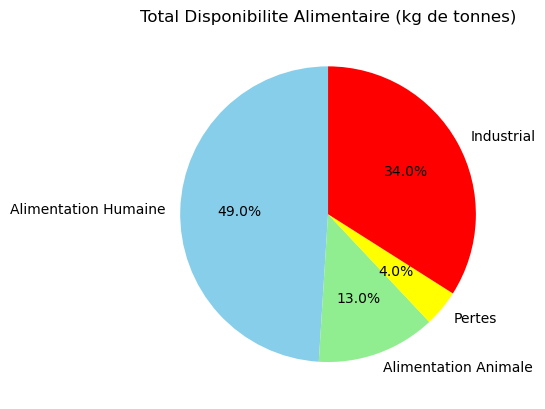

In [51]:
# graphique
labels = ['Alimentation Humaine', 'Alimentation Animale', 'Pertes', 'Industrial']
totals = [49, 13, 4, 34]

plt.pie(totals, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'Yellow', 'Red'])
plt.title('Total Disponibilite Alimentaire (kg de tonnes)')
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [52]:
#Création d'une liste avec toutes les variables
cereales = ('Ble', 'Riz', 'Mais', 'Avoine', 'Orge', 'Seigle', 'Millet', 'Sorgho', 'Quinoa',
    'Epeautre', 'Kamut', 'Sorgho', 'Teff', 'Einkorn', 'Amarante', 'Riz (Eq Blanchi)', 'Soja'
    'Boulgour', 'avoine', 'Seigle', 'Semoule de ble', 'Son de ble', 'Farro', 'Polenta', 'Couscous', 'Epeautre concasse',
    'Germe de ble', 'Riz basmati', 'Riz gluant', 'Riz a grains courts',
    'Riz a grains longs', 'Riz brun', 'Semoule de mais', 'Graines de sarrasin',
    'Sarrasin', 'Farine de sarrasin', 'Riz noir', 'Riz rouge', 'Riz rose',
    'Riz violet', 'Ble noir', 'Ble tendre', 'Ble dur', 'Flocons de seigle',
    'Quinoa rouge', 'Quinoa blanc', 'Quinoa noir', 'Farine de quinoa',
    'Farine de mais', 'Farine de riz', 'Farine de ble', 'Farine d\'epeautre',
    'Farine de millet', 'Farine de sorgho', 'Farine de sarrasin', 'Farine de mais',
    'Farine de chataigne', 'Farine de pois chiche', 'Farine de riz complet',
    'Farine de pois chiche', 'Farine de pois', 'Semoule de ble dur',
    'Semoule de mais', 'Semoule de riz', 'epeautre')
print(cereales)



('Ble', 'Riz', 'Mais', 'Avoine', 'Orge', 'Seigle', 'Millet', 'Sorgho', 'Quinoa', 'Epeautre', 'Kamut', 'Sorgho', 'Teff', 'Einkorn', 'Amarante', 'Riz (Eq Blanchi)', 'SojaBoulgour', 'avoine', 'Seigle', 'Semoule de ble', 'Son de ble', 'Farro', 'Polenta', 'Couscous', 'Epeautre concasse', 'Germe de ble', 'Riz basmati', 'Riz gluant', 'Riz a grains courts', 'Riz a grains longs', 'Riz brun', 'Semoule de mais', 'Graines de sarrasin', 'Sarrasin', 'Farine de sarrasin', 'Riz noir', 'Riz rouge', 'Riz rose', 'Riz violet', 'Ble noir', 'Ble tendre', 'Ble dur', 'Flocons de seigle', 'Quinoa rouge', 'Quinoa blanc', 'Quinoa noir', 'Farine de quinoa', 'Farine de mais', 'Farine de riz', 'Farine de ble', "Farine d'epeautre", 'Farine de millet', 'Farine de sorgho', 'Farine de sarrasin', 'Farine de mais', 'Farine de chataigne', 'Farine de pois chiche', 'Farine de riz complet', 'Farine de pois chiche', 'Farine de pois', 'Semoule de ble dur', 'Semoule de mais', 'Semoule de riz', 'epeautre')


In [53]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales_data = dispo_alimentaire[dispo_alimentaire['Produit'].isin(cereales)]
print(cereales_data)

                 Zone           Produit   Origine  Aliments pour animaux  \
34        Afghanistan            Millet  vegetale                    0.0   
40        Afghanistan              Orge  vegetale                  360.0   
47        Afghanistan  Riz (Eq Blanchi)  vegetale                    0.0   
67     Afrique du Sud            Avoine  vegetale                    8.0   
113    Afrique du Sud            Millet  vegetale                    8.0   
...               ...               ...       ...                    ...   
15511        Éthiopie            Seigle  vegetale                    0.0   
15513        Éthiopie            Sorgho  vegetale                    0.0   
15575    Îles Salomon              Orge  vegetale                    0.0   
15591    Îles Salomon  Riz (Eq Blanchi)  vegetale                    0.0   
15593    Îles Salomon            Sorgho  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
34       

In [54]:
total_dispo_cereale = cereales_data['Disponibilité intérieure calculée'].sum()
print (total_dispo_cereale )

744227.0


In [55]:
#Affichage de la proportion d'alimentation animale
proportion_alim_animale = (cereales_data['Aliments pour animaux'].sum() / (total_dispo_cereale)) * 100
print(f"La proportion d'alimentation des animaux est de : {proportion_alim_animale}")

La proportion d'alimentation des animaux est de : 24.013640999318756


In [56]:
#Affichage de la proportion d'alimentation humaine
proportion_alim_humaine = (cereales_data['Nourriture'].sum() / (total_dispo_cereale)) * 100
print(f"La proportion d'alimentation humaine est de : {proportion_alim_humaine}")

La proportion d'alimentation humaine est de : 59.2128476929754


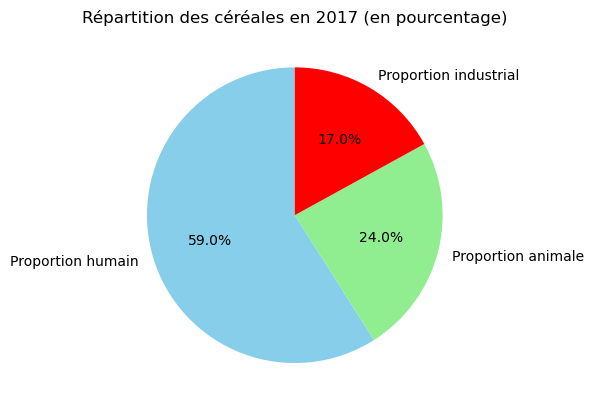

In [57]:
labels = ['Proportion humain', 'Proportion animale', 'Proportion industrial']
sizes = [59, 24, 17]

# Crear un gráfico de camembert
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'Red'])
plt.title('Répartition des céréales en 2017 (en pourcentage)')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [58]:
#Création de la colonne proportion par pays
population_sousnutrition2017['Proportion de personnes sous-alimentées'] = (population_sousnutrition2017['Sous_nutrition'] / population_sousnutrition2017['Population']) / 1

In [59]:
#affichage après trie des 10 pires pays
pire_10_pays = population_sousnutrition2017.sort_values(by='Proportion de personnes sous-alimentées', ascending=False).head(10)

print(pire_10_pays[['Zone', 'Proportion de personnes sous-alimentées']])

                                           Zone  \
78                                        Haïti   
157  République populaire démocratique de Corée   
108                                  Madagascar   
103                                     Libéria   
100                                     Lesotho   
183                                       Tchad   
161                                      Rwanda   
121                                  Mozambique   
186                                 Timor-Leste   
0                                   Afghanistan   

     Proportion de personnes sous-alimentées  
78                                  0.482592  
157                                 0.471887  
108                                 0.410629  
103                                 0.382797  
100                                 0.382494  
183                                 0.379576  
161                                 0.350556  
121                                 0.328109  
186            

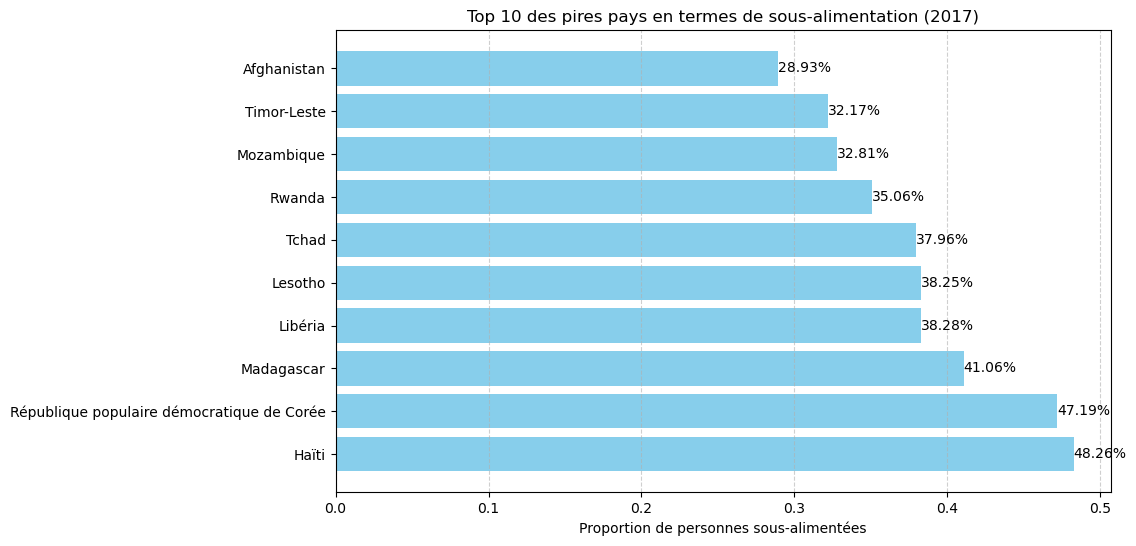

In [60]:
paises = pire_10_pays['Zone']
proportion_sous_alimentees = pire_10_pays['Proportion de personnes sous-alimentées']

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(paises, proportion_sous_alimentees, color='skyblue')
plt.xlabel('Proportion de personnes sous-alimentées')
plt.title('Top 10 des pires pays en termes de sous-alimentation (2017)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el tableau de chigres
for i, value in enumerate(proportion_sous_alimentees):
    plt.text(value, i, f"{value:.2%}", va='center', fontsize=10)

# Mostrar el gráfico
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [61]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_depuis_2013 = aide_alimentaire[aide_alimentaire['Année'] >= 2013]
total_aide_alimentaire_par_pays = aide_alimentaire_depuis_2013.groupby('Zone')['Valeur'].sum().reset_index()

In [62]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_10_pays_aide_alimentaire = total_aide_alimentaire_par_pays.sort_values(by='Valeur', ascending=False).head(10)
print(top_10_pays_aide_alimentaire)

                                Zone      Valeur
50         République arabe syrienne  1858943000
75                          Éthiopie  1381294000
70                             Yémen  1206484000
61                     Soudan du Sud   695248000
60                            Soudan   669784000
30                             Kenya   552836000
3                         Bangladesh   348188000
59                           Somalie   292678000
53  République démocratique du Congo   288502000
43                             Niger   276344000


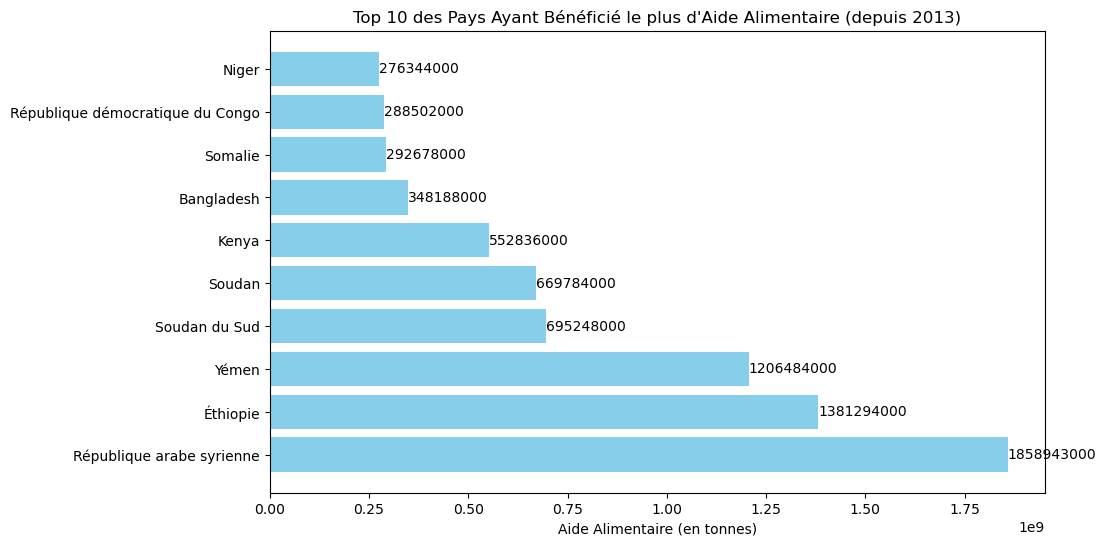

In [63]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_pays_aide_alimentaire['Zone'], top_10_pays_aide_alimentaire['Valeur'], color='skyblue')


plt.title("Top 10 des Pays Ayant Bénéficié le plus d'Aide Alimentaire (depuis 2013)")
plt.xlabel('Aide Alimentaire (en tonnes)')


for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval), va='center', ha='left')


plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [64]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
# 1. Création d'un DataFrame avec la zone, l'année et l'aide alimentaire
aide_alimentaire_zone_annee = aide_alimentaire[['Zone', 'Année', 'Valeur']]

# 2. Groupby sur zone et année
aide_alimentaire_zone_annee_grouped = aide_alimentaire_zone_annee.groupby(['Zone', 'Année']).sum().reset_index()

In [65]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top_5_pays_beneficiaires = aide_alimentaire_zone_annee_grouped.groupby('Zone')['Valeur'].sum().nlargest(5).index.tolist()

In [66]:
print (top_5_pays_beneficiaires)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [67]:
#On filtre sur le dataframe avec notre liste
top_5_pays_aide_alimentaire = aide_alimentaire_zone_annee_grouped[aide_alimentaire_zone_annee_grouped['Zone'].isin(top_5_pays_beneficiaires)]

In [68]:
# Affichage des pays avec l'aide alimentaire par année, valeur c'est en milliers de kg
print(top_5_pays_aide_alimentaire)

                          Zone  Année     Valeur
157  République arabe syrienne   2013  563566000
158  République arabe syrienne   2014  651870000
159  République arabe syrienne   2015  524949000
160  République arabe syrienne   2016  118558000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000
191                     Soudan   2015   17650000
192              Soudan du Sud   2013  196330000
193              Soudan du Sud   2014  450610000
194              Soudan du Sud   2015   48308000
214                      Yémen   2013  264764000
215                      Yémen   2014  103840000
216                      Yémen   2015  372306000
217                      Yémen   2016  465574000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
227                   Éthiopie   2015  203266000


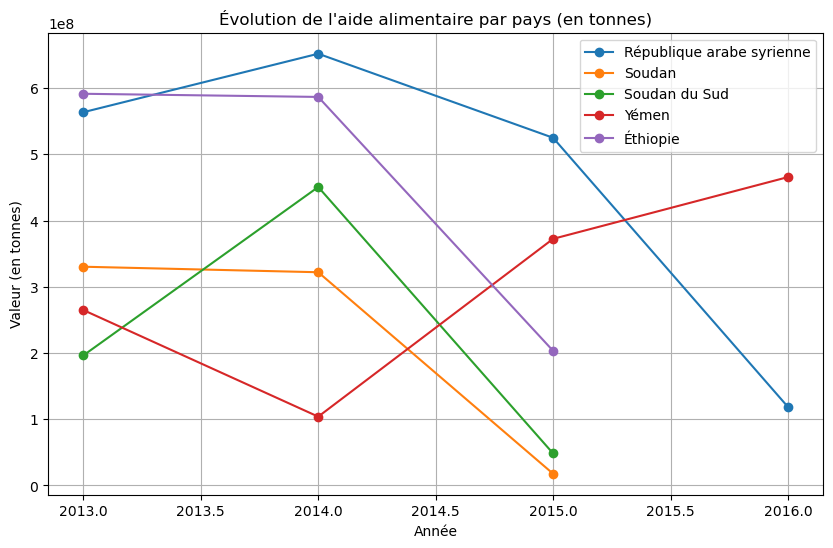

In [69]:
data = {'République arabe syrienne': [563566000, 651870000, 524949000, 118558000],'Soudan': [330230000, 321904000, 17650000],
'Soudan du Sud': [196330000, 450610000, 48308000],'Yémen': [264764000, 103840000, 372306000, 465574000], 'Éthiopie': [591404000, 586624000, 203266000]}

plt.figure(figsize=(10, 6))
for country, values in data.items():
    plt.plot(range(2013, 2013 + len(values)), values, label=country, marker='o')

plt.title("Évolution de l'aide alimentaire par pays (en tonnes)")
plt.xlabel('Année')
plt.ylabel('Valeur (en tonnes)')
plt.legend()
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [70]:
##Calcul de la disponibilité en kcal par personne par jour par pay
pays_dispo = dispo_alimentaire.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
print(pays_dispo)

                      Zone  Disponibilité alimentaire (Kcal/personne/jour)
0              Afghanistan                                       2087000.0
1           Afrique du Sud                                       3020000.0
2                  Albanie                                       3188000.0
3                  Algérie                                       3293000.0
4                Allemagne                                       3503000.0
..                     ...                                             ...
169    Émirats arabes unis                                       3275000.0
170               Équateur                                       2346000.0
171  États-Unis d'Amérique                                       3682000.0
172               Éthiopie                                       2129000.0
173           Îles Salomon                                       2383000.0

[174 rows x 2 columns]


In [71]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
top_10_pays_moins_dispo = pays_dispo.nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
top_10_pays_moins_dispo = top_10_pays_moins_dispo.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
print (top_10_pays_moins_dispo)

                                           Zone  \
154                                 Timor-Leste   
114                                     Ouganda   
167                                    Zimbabwe   
151                                       Tchad   
133  République populaire démocratique de Corée   
65                                        Haïti   
0                                   Afghanistan   
91                                   Madagascar   
166                                      Zambie   
128                   République centrafricaine   

     Disponibilité alimentaire (Kcal/personne/jour)  
154                                       2129000.0  
114                                       2126000.0  
167                                       2113000.0  
151                                       2109000.0  
133                                       2093000.0  
65                                        2089000.0  
0                                         2087000.0  
91    

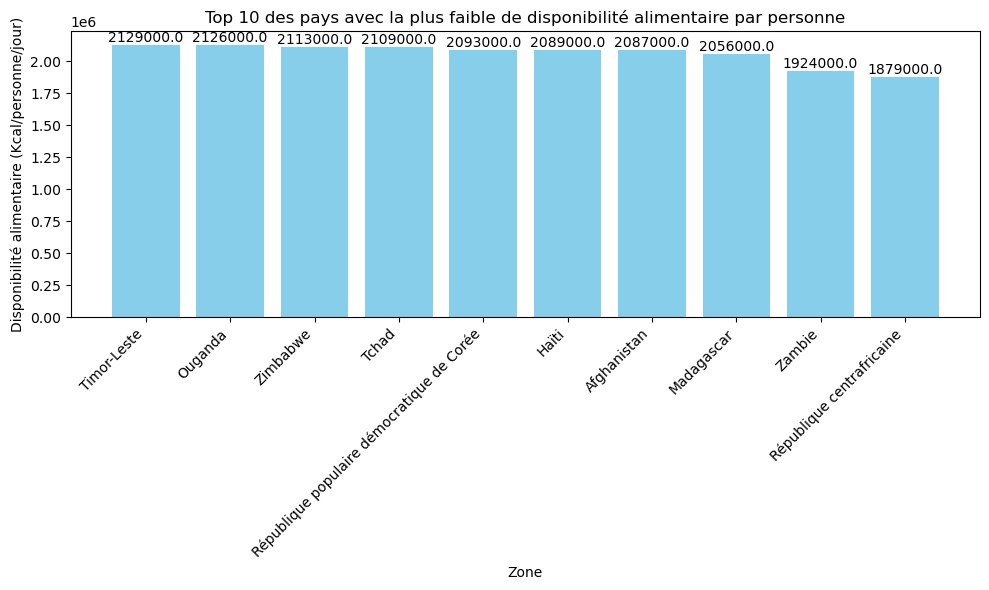

In [72]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_pays_moins_dispo['Zone'], top_10_pays_moins_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('Top 10 des pays avec la plus faible de disponibilité alimentaire par personne')

plt.tight_layout() 
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [73]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
top_10_pays_plus_dispo = pays_dispo.nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
top_10_pays_plus_dispo = pays_dispo.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
print(top_10_pays_plus_dispo)


                      Zone  Disponibilité alimentaire (Kcal/personne/jour)
11                Autriche                                       3770000.0
16                Belgique                                       3737000.0
159                Turquie                                       3708000.0
171  États-Unis d'Amérique                                       3682000.0
74                  Israël                                       3610000.0
72                 Irlande                                       3602000.0
75                  Italie                                       3578000.0
89              Luxembourg                                       3540000.0
168                 Égypte                                       3518000.0
4                Allemagne                                       3503000.0


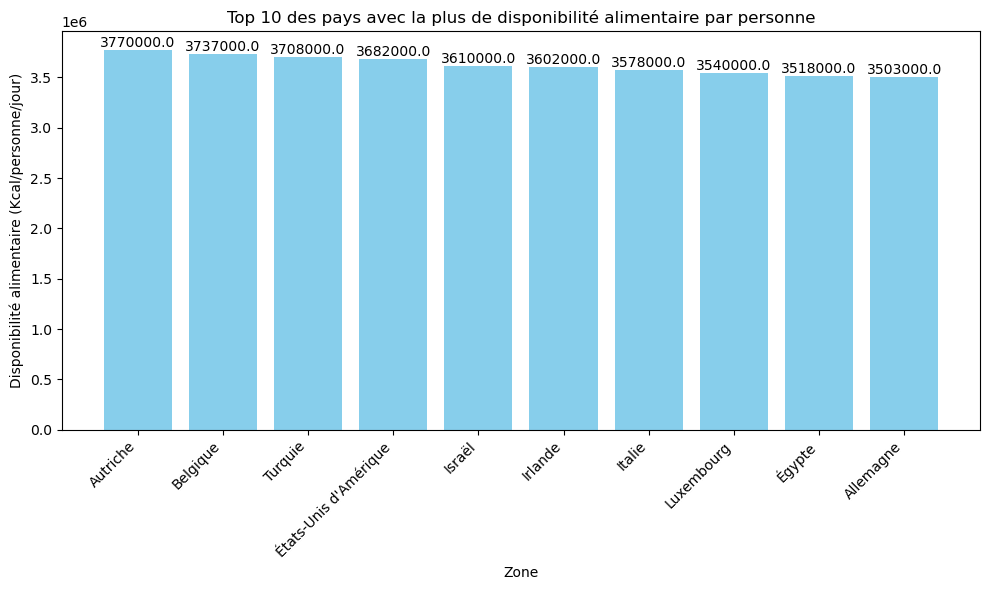

In [74]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_pays_plus_dispo['Zone'], top_10_pays_plus_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('Top 10 des pays avec la plus de disponibilité alimentaire par personne')

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [75]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_manioc_thailande = dispo_alimentaire[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande')]

In [76]:
print (dispo_manioc_thailande)

            Zone Produit   Origine  Aliments pour animaux  \
13809  Thaïlande  Manioc  vegetale                 1800.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
13809               2081.0                                         40000.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
13809                                            13000.0        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
13809                                               0.05               

       Disponibilité de protéines en quantité (g/personne/jour)  \
13809                                               0.14          

       Disponibilité intérieure  Exportations - Quantité  \
13809                    6264.0                  25214.0   

       Importations - Quantité  Nourriture  Pertes  Production  Semences  \
13809                   1250.0       871.0  1511.0     30228.0       0.0   

       Traitement  Variation de sto

In [77]:
#Calcul de la sous nutrition en Thaïlande
thaïlande_sous_nutrition = sous_nutrition[sous_nutrition['Zone'] == 'Thaïlande']


In [78]:
print (thaïlande_sous_nutrition)

           Zone      Année  Sous_nutrition
1110  Thaïlande  2012-2014       6200000.0
1111  Thaïlande  2013-2015       6000000.0
1112  Thaïlande  2014-2016       5900000.0
1113  Thaïlande  2015-2017       6000000.0
1114  Thaïlande  2016-2018       6200000.0
1115  Thaïlande  2017-2019       6500000.0


In [79]:
#Calcul population 
population_thailand = population[population['Zone'] == 'Thaïlande']
total_population_thailand = population_thailand['Population'].sum()
print(f'Total population en Thaïlande: {total_population_thailand}')

Total population en Thaïlande: 412907346.0


In [80]:
sous_nutrition_thailande = thaïlande_sous_nutrition['Sous_nutrition'].sum()

print(f"Sous nutrition en Thaïlande: {sous_nutrition_thailande} millions d'habitants")

Sous nutrition en Thaïlande: 36800000.0 millions d'habitants


In [81]:
#Calcul Production
dispo_manioc_thailande['Manioc_prod_thai'] = dispo_manioc_thailande['Production'].sum()
print ("La production de manioc est:", dispo_manioc_thailande['Manioc_prod_thai'], "milliers de tonnes")

La production de manioc est: 13809    30228.0
Name: Manioc_prod_thai, dtype: float64 milliers de tonnes


/var/folders/cy/t20bxd4s1n30wgrjxd5xxwpr0000gn/T/ipykernel_64521/1785697078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_manioc_thailande['Manioc_prod_thai'] = dispo_manioc_thailande['Production'].sum()


In [82]:
#Calcul exportation
dispo_manioc_thailande['Manioc_exp_thai'] = dispo_manioc_thailande['Exportations - Quantité'].sum()
print ("La exportation de manioc est:", dispo_manioc_thailande['Manioc_exp_thai'], "milliers de tonnes")

La exportation de manioc est: 13809    25214.0
Name: Manioc_exp_thai, dtype: float64 milliers de tonnes


/var/folders/cy/t20bxd4s1n30wgrjxd5xxwpr0000gn/T/ipykernel_64521/3461820595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_manioc_thailande['Manioc_exp_thai'] = dispo_manioc_thailande['Exportations - Quantité'].sum()


In [83]:
Dif_prod_exp = dispo_manioc_thailande['Manioc_prod_thai'] - dispo_manioc_thailande['Manioc_exp_thai']
print (Dif_prod_exp) 

13809    5014.0
dtype: float64


In [84]:
#Calcul quelle est la disponibilité par habitant pour la Thaïlande ? 
dispo_manioc_par_habitant = (total_population_thailand / Dif_prod_exp)
print ("La disponibilité de manioc par habitant en thailande est:", dispo_manioc_par_habitant)

La disponibilité de manioc par habitant en thailande est: 13809    82350.886717
dtype: float64


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [149]:
data_vegetauxrd = dispoalim_pop[(dispoalim_pop['Origine'] == 'vegetale') & (dispoalim_pop['Zone'] == 'République dominicaine') & (dispoalim_pop['Année'] == 2017)]

In [150]:
print (data_vegetauxrd)

                         Zone                 Produit   Origine  \
70858  République dominicaine   Aliments pour enfants  vegetale   
70864  République dominicaine                  Ananas  vegetale   
70876  République dominicaine  Arachides Decortiquees  vegetale   
70882  République dominicaine                  Avoine  vegetale   
70888  République dominicaine                 Bananes  vegetale   
...                       ...                     ...       ...   
71302  République dominicaine                  Sésame  vegetale   
71308  République dominicaine                     Thé  vegetale   
71314  République dominicaine                 Tomates  vegetale   
71350  République dominicaine                     Vin  vegetale   
71356  République dominicaine          Épices, Autres  vegetale   

       Aliments pour animaux  Autres Utilisations  \
70858                    0.0                  0.0   
70864                    0.0                  0.0   
70876                    0.0        

In [153]:
total_vegetaauxrd = data_vegetaux['Disponibilité alimentaire en quantité (kg/personne/an)'].sum()
print(f'Total de vegetaux: {total_vegetaauxrd} kg an')

Total de vegetaux: 519199620.0 kg an


In [157]:
prod_vegetauxrd = data_vegetaux['Production'].sum()
print (f'Production total: {prod_vegetauxrd} kg an')

Production total: 51436800.0 kg an


In [154]:
import_vegetauxrd = data_vegetaux['Importations - Quantité'].sum()
print(f'Importations total: {import_vegetauxrd} kg')

Importations total: 6148302.0 kg


In [155]:
export_vegetauxrd = data_vegetaux['Exportations - Quantité'].sum()
print(f'Exportation total: {export_vegetauxrd} kg')

Exportation total: 6570186.0 kg


In [159]:
dif = prod_vegetauxrd - (export_vegetauxrd - import_vegetauxrd)
print (f'En 2017 la disponibilité de vegetaux en rd: {dif} kg')

En 2017 la disponibilité de vegetaux en rd: 51014916.0 kg


In [169]:
poblation_total_rd2017 = 10513104.0
print (f'En 2017 le total de la poblation en RD: {poblation_total_rd2017} habitants')

En 2017 le total de la poblation en RD: 10513104.0 habitants


In [185]:
quantité_nourris = poblation_total_rd2017 / dif
print (f'{quantité_nourris} personnes ont était nourris en 2017')

0.2060790220648408 personnes ont était nourris en 2017


In [192]:
#donner la part de l'alimentation humaine, animale et perdue
disponibilite_interieurd = (data_vegetauxrd['Disponibilité intérieure'].sum())

# Calcule total alimentation humaine
dispo_humainevegrd = (data_vegetauxrd['Nourriture'].sum() / (disponibilite_interieurd)) * 100   

# Filtre de "Aliments pour animaux"
dispo_animalevegrd = (data_vegetauxrd['Aliments pour animaux'].sum() / (disponibilite_interieurd)) *100

# Filtre "Pertes"
dispo_pertesvegrd = (data_vegetauxrd['Pertes'].sum() / (disponibilite_interieurd)) *100


print("Total Alimentation Humaine:", dispo_humainevegrd)
print("Total Alimentation Animale:", dispo_animalevegrd)
print("Total Pertes:", dispo_pertesvegrd)

Total Alimentation Humaine: 46.018266303477006
Total Alimentation Animale: 9.846178497035732
Total Pertes: 4.013779842973882
